In [76]:
# Import matplotlib library
import matplotlib.pyplot as plt
 
# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
 
import numpy as np

In [77]:
# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [79]:
#introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [80]:
# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

In [81]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [82]:
# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7


In [83]:
# Function to plot images in 3 * 4 
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

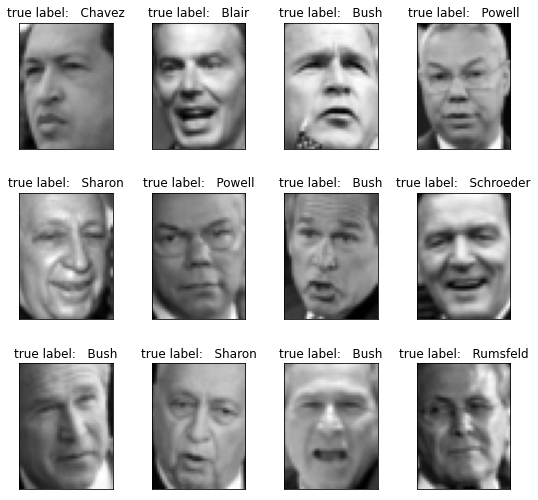

In [84]:
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)
 
true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

size of training Data is  966 and Testing Data is  322


In [98]:
n_components = 150
 

pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X_train)

 
eigenfaces = pca.components_.reshape((n_components, h, w))
 
print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Projecting the input data on the eigenfaces orthonormal basis


In [108]:
# Function to plot images in 3 * 4 
def plot_gallery(eigenfaces, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenfaces[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

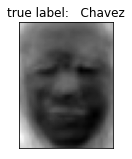

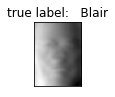

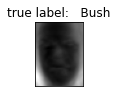

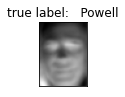

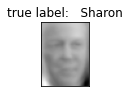

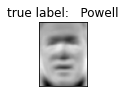

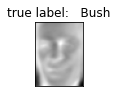

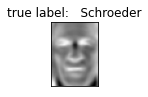

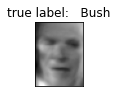

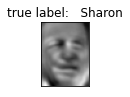

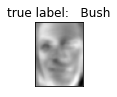

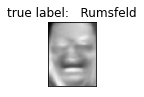

In [109]:
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)
 
true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(eigenfaces, true_titles, h, w)

In [103]:
print("Sample Data point after applying PCA\n", X_train_pca[0])
print("-----------------------------------------------------")
print("Dimensions of training set = % s and Test Set = % s"%(
        X_train.shape, X_test.shape))

Sample Data point after applying PCA
 [-2.075603   -1.0457892   2.1269386   0.03682684 -0.75756913 -0.5173675
  0.8555111   1.0519332   0.45773524  0.01347785 -0.03963608  0.638727
  0.4816835   2.3378513   1.7784592   0.13310802 -2.2712908  -4.4569316
  2.0977323  -1.1379306   0.18844429 -0.3349849   1.1254617  -0.3240313
  0.14094397  1.0769405   0.7588278  -0.09977248  3.1199694   0.8837635
 -0.89339346  1.1595935   1.4307097   1.6856253   1.3434796  -1.2590517
 -0.6391131  -2.3362994  -0.01372668 -1.4639133  -0.46889398 -1.0547827
 -1.3327848   1.1364983   2.222386   -1.8015571  -0.30633283 -1.0282928
  4.7737327   3.4594612   1.925983   -1.3513008  -0.25902015  2.010422
 -1.0560822   0.36054507  1.1708852   0.75730383  0.90084016  0.59846973
 -0.46578655  2.09815     1.3469335   1.9331409   5.0673532  -0.7076917
  0.6050352  -0.8978917  -0.2154016  -2.1078932  -1.6852231  -0.20142177
 -1.7460288  -3.0612807   2.0506723   0.39548662  0.12604956  1.2073863
 -0.7926645  -1.4005277  -